In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import seaborn as sns

In [2]:
data = pd.read_csv("breast-cancer.csv")

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [5]:
data.shape

(569, 32)

In [6]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
data.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [8]:
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
data.drop(columns = ["id"] , inplace = True)

In [10]:
data["diagnosis"] = np.where(data["diagnosis"] == "M" , 1 , 0)

In [12]:
X = data.drop(columns = ["diagnosis"])
Y = data["diagnosis"]

In [14]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(X , Y, test_size= 0.25, random_state=0)

In [15]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)

In [16]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=10)  
classifier.fit(x_train[:, [0 , 1]], y_train) 

KNeighborsClassifier(n_neighbors=10)

In [17]:
y_pred = classifier.predict(x_test[:, [0, 1]])

In [18]:
from sklearn.metrics import accuracy_score , confusion_matrix

In [19]:
accuracy_score(y_test , y_pred)

0.8671328671328671

<AxesSubplot:>

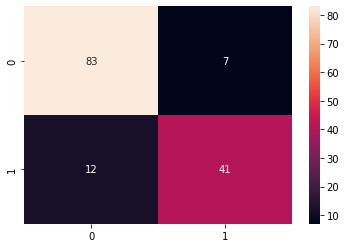

In [20]:
sns.heatmap(confusion_matrix(y_test , y_pred) , annot = True , fmt = 'd')

In [21]:
from matplotlib.colors import ListedColormap

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


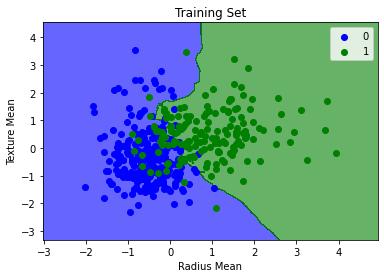

In [22]:
# For training set
x1 , x2 = x_train[:,0] , x_train[:, 1]
x1_min , x1_max = x1.min() - 1 , x1.max() + 1
x2_min , x2_max = x2.min() - 1 , x2.max() + 1

xx1 , xx2 = np.meshgrid(np.arange(x1_min , x1_max , 0.01),
                        np.arange(x2_min , x2_max , 0.01))
plt.contourf(xx1 , xx2 , 
             classifier.predict(np.array([xx1.ravel() , xx2.ravel()]).T).reshape(xx1.shape)
              , alpha = 0.6 , cmap = ListedColormap(("blue" , "green"))
             )
plt.xlim(x1_min  , x1_max)
plt.ylim(x2_min , x2_max)
for i, j in enumerate(np.unique(y_train)):  
    plt.scatter(x1[y_train == j], x2[y_train == j],  
        c = ListedColormap(('blue', 'green'))(i), label = j)
    
plt.title("Training Set")
plt.xlabel("Radius Mean")
plt.ylabel("Texture Mean")
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


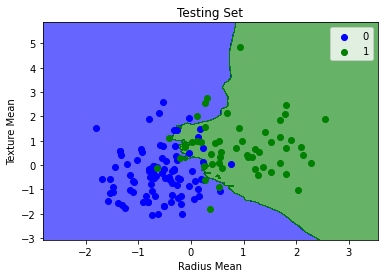

In [23]:
# For training set
x1 , x2 = x_test[:,0] , x_test[:, 1]
x1_min , x1_max = x1.min() - 1 , x1.max() + 1
x2_min , x2_max = x2.min() - 1 , x2.max() + 1

xx1 , xx2 = np.meshgrid(np.arange(x1_min , x1_max , 0.01),
                        np.arange(x2_min , x2_max , 0.01))
plt.contourf(xx1 , xx2 , 
             classifier.predict(np.array([xx1.ravel() , xx2.ravel()]).T).reshape(xx1.shape)
              , alpha = 0.6 , cmap = ListedColormap(("blue" , "green"))
             )
plt.xlim(x1_min  , x1_max)
plt.ylim(x2_min , x2_max)
for i, j in enumerate(np.unique(y_test)):  
    plt.scatter(x1[y_test == j], x2[y_test == j],  
        c = ListedColormap(('blue', 'green'))(i), label = j)
    
plt.title("Testing Set")
plt.xlabel("Radius Mean")
plt.ylabel("Texture Mean")
plt.legend()
plt.show()